In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df=pd.read_csv("/Users/gsr/Desktop//StudentsPerformance.csv")

In [17]:
df.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [19]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [21]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [23]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [25]:
q1=df["math score"].quantile(0.25)
q3=df["math score"].quantile(0.75)

In [27]:
q1,q3

(57.0, 77.0)

In [29]:
IQR=q3-q1

In [31]:
IQR

20.0

In [33]:
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR

In [35]:
lower_limit,upper_limit

(27.0, 107.0)

In [56]:
outliers = df[(df["math score"] < lower_limit) | (df["math score"] > upper_limit)]


In [58]:
outliers


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,zscore
17,female,group B,some high school,free/reduced,none,18,32,28,-3.171453
59,female,group C,some high school,free/reduced,none,0,17,10,-4.358547
145,female,group C,some college,free/reduced,none,22,39,33,-2.907655
338,female,group B,some high school,free/reduced,none,24,38,27,-2.775755
466,female,group D,associate's degree,free/reduced,none,26,31,38,-2.643856
787,female,group B,some college,standard,none,19,38,32,-3.105504
842,female,group B,high school,free/reduced,completed,23,44,36,-2.841705
980,female,group B,high school,free/reduced,none,8,24,23,-3.830950


In [60]:
df[(df["math score"]>lower_limit)|(df["math score"]<upper_limit)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,zscore
0,female,group B,bachelor's degree,standard,none,72,72,74,0.389828
1,female,group C,some college,standard,completed,69,90,88,0.191979
2,female,group B,master's degree,standard,none,90,95,93,1.576922
3,male,group A,associate's degree,free/reduced,none,47,57,44,-1.258913
4,male,group C,some college,standard,none,76,78,75,0.653627
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,1.445023
996,male,group C,high school,free/reduced,none,62,55,55,-0.269668
997,female,group C,high school,free/reduced,completed,59,71,65,-0.467517
998,female,group D,some college,standard,completed,68,78,77,0.126030


In [62]:
df.describe()

,math score,reading score,writing score,zscore
count,1000.00000,1000.000000,1000.000000,1.000000e+03
mean,66.08900,69.169000,68.054000,8.171241e-17
std,15.16308,14.600192,15.195657,1.000000e+00
min,0.00000,17.000000,10.000000,-4.358547e+00
25%,57.00000,59.000000,57.750000,-5.994165e-01
50%,66.00000,70.000000,69.000000,-5.869520e-03
75%,77.00000,79.000000,79.000000,7.195768e-01
max,100.00000,100.000000,100.000000,2.236419e+00


In [64]:
df['zscore']=(df["math score"]-df["math score"].mean())/df["math score"].std()
df['zscore']

0      0.389828
1      0.191979
2      1.576922
3     -1.258913
4      0.653627
         ...   
995    1.445023
996   -0.269668
997   -0.467517
998    0.126030
999    0.719577
Name: zscore, Length: 1000, dtype: float64

In [66]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,zscore
0,female,group B,bachelor's degree,standard,none,72,72,74,0.389828
1,female,group C,some college,standard,completed,69,90,88,0.191979
2,female,group B,master's degree,standard,none,90,95,93,1.576922
3,male,group A,associate's degree,free/reduced,none,47,57,44,-1.258913
4,male,group C,some college,standard,none,76,78,75,0.653627
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,1.445023
996,male,group C,high school,free/reduced,none,62,55,55,-0.269668
997,female,group C,high school,free/reduced,completed,59,71,65,-0.467517
998,female,group D,some college,standard,completed,68,78,77,0.126030


In [68]:
import seaborn as sns

<Axes: xlabel='math score'>

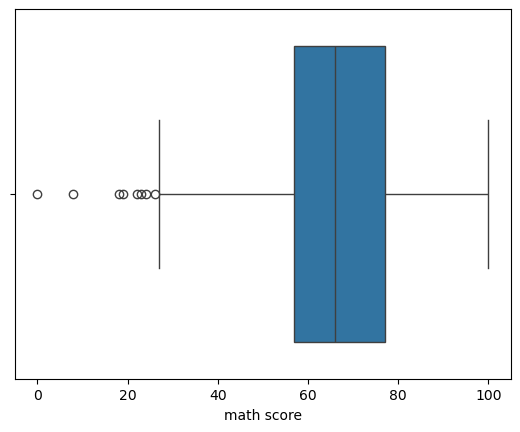

In [70]:
sns.boxplot(x= df["math score"])